In [1]:
from numpy import random, array
from pymc import MCMC, Matplot, Beta, Bernoulli, Lambda, Poisson, Uniform, deterministic
%matplotlib inline

In [2]:
# Sample size
n = 1000
# True mean count, given occupancy
theta = 2
# True occupancy
pi = 0.4

In [3]:
# Simulate some data data
y = [(random.random()<pi) * random.poisson(theta) for i in range(n)]

# Estimated occupancy
p = Beta('p', 1, 1)

# Latent variable for occupancy
z = Bernoulli('z', p, value=array(y)>0, plot=False)

# Estimated mean count
theta_hat = Uniform('theta_hat', 0, 100, value=3)

In [4]:
@deterministic(plot=False)
def t(z=z, theta=theta_hat):
    """Per-site Poisson count parameter"""

    return z*theta

# Poisson likelihood
counts = Poisson('counts', t, value=y, observed=True)

In [5]:
# Run the model
M = MCMC([p, z, theta_hat, t, counts])
M.sample(10000, 5000, verbose=0)

 [-----------------100%-----------------] 10000 of 10000 complete in 3.1 sec

Plotting theta_hat
Plotting p


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


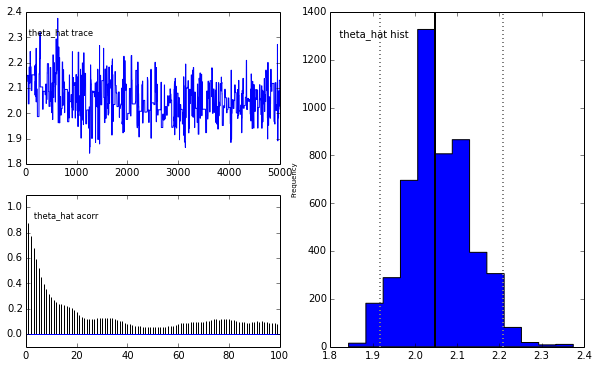

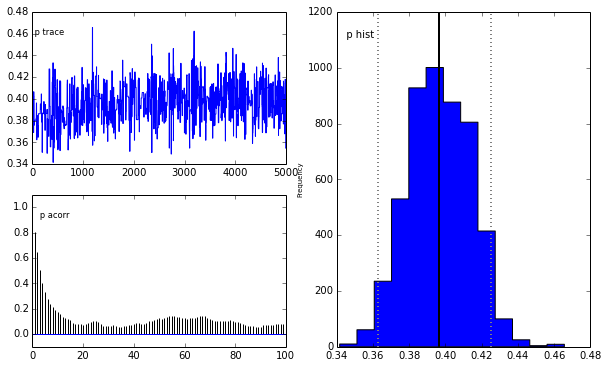

In [8]:
Matplot.plot(M)